# 如何用Python探索星體的位置、距離及亮度？
此notebook為[《資料視覺化：用Python為星空作畫》](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出(我原本擬定的書名為《用Python探索天文：從資料取得到視覺化》，後應出版社要求改為現名）。我會持續透過創作故事、遊戲等有趣體驗來向大眾推廣開放科學，歡迎你加入「[Astrohackers-TW: Python在天文領域的應用](https://www.facebook.com/groups/astrohackers.tw.py)」FB社團，並追蹤我的[Threads](https://www.threads.net/@astrobackhacker)。

以下範例程式會使用到[Astropy](https://www.astropy.org/)和[Astroquery](https://astroquery.readthedocs.io/en/latest/)兩個套件
* Astropy整合了天文資料處理分析過程所需的常用功能，例如物理單位轉換、日期時間處理、星體坐標轉換、FITS檔案讀寫與操作、模型資料擬合、統計和畫圖等。Astropy的子套件coordinates能以不同的天文座標系統來表示星體的座標位置，其中最核心的工具是SkyCoord類別。SkyCoord方便我們處理天文座標，例如查詢已知星體的位置、定義星體的座標、在不同座標系統之間進行轉換。
* Astroquery是一個能串接不同天文資料庫服務以方便取得各種天文資料的Python套件。它提供多個模組，用於查詢不同的天文資料庫服務。其中，[simbad模組](https://astroquery.readthedocs.io/en/latest/simbad/simbad.html)可以連接到[SIMBAD](https://simbad.cds.unistra.fr/simbad/)天文資料庫，查詢到關於恆星、星系、星雲、太陽系外行星等各種天體的基本資訊，比如它們的位置、距離、光譜類型、亮度以及其他物理參數。

In [ ]:
# 安裝Astropy和Astroquery
!pip install astropy
!pip install astroquery

## (一) 如何用Python探索星體的方位？

In [1]:
'''使用SkyCoord查詢北極星的赤道座標位置'''
from astropy.coordinates import SkyCoord

# 查詢北極星的位置
polaris = SkyCoord.from_name("Polaris")
print(f"北極星的赤經是：{polaris.ra}，赤緯是：{polaris.dec}")

北極星的赤經是：37.95456067 deg，赤緯是：89.26410897 deg


In [2]:
'''使用SkyCoord定義某個星體的赤道座標'''
from astropy.coordinates import SkyCoord
import astropy.units as u

# 定義莫妮卡星的赤道座標
monica_coord = SkyCoord(ra=236.06697546*u.degree, dec=6.42563022*u.degree)
print(f"莫妮卡星的赤經是： {monica_coord.ra}，赤緯是： {monica_coord.dec}")

莫妮卡星的赤經是： 236.06697546 deg，赤緯是： 6.42563022 deg


In [3]:
'''使用SkyCoord轉換天文座標系統'''
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timezone, timedelta

# 定義觀測時間
taiwan_time = datetime.strptime('2024-09-22 19:00:00', '%Y-%m-%d %H:%M:%S')
taiwan_timezone = timezone(timedelta(hours=8))
taiwan_time = taiwan_time.replace(tzinfo=taiwan_timezone)
utc_time = taiwan_time.astimezone(timezone.utc)
obs_time = Time(utc_time)

# 定義觀測地點(位於台中的天文主題獨立書店「仰望書房」)
obs_location = EarthLocation(lat=24.1555*u.deg, lon=120.6755*u.deg)

# 定義莫妮卡星的赤道座標
monica_radec = SkyCoord(ra=236.06697546*u.degree, dec=6.42563022*u.degree)

# 將莫妮卡星的赤道座標轉換成地平座標
monica_altaz = monica_radec.transform_to(AltAz(obstime=obs_time, location=obs_location))
print(f"莫妮卡星在你指定的時間地點的地平座標：方位角={monica_altaz.az}, 仰角={monica_altaz.alt}")

莫妮卡星在你指定的時間地點的地平座標：方位角=258.7098798517395 deg, 仰角=37.924117175378356 deg


## (二) 如何用Python探索星體有多遠？


In [4]:
'''定義描述星體距離的常用單位'''
from astropy import units as u

# 定義一個天文單位的距離
distance_in_au = 1 * u.au
# 定義一光年的距離
distance_in_ly = 1 * u.lyr
# 定義一個秒差距的距離
distance_in_pc = 1 * u.pc

# 將天文單位、光年和秒差距轉換成公里
distance_in_au_km = distance_in_au.to(u.km)
distance_in_ly_km = distance_in_ly.to(u.km)
distance_in_pc_km = distance_in_pc.to(u.km)

# 印出各個單位轉換成公里後的值
print(f"1個天文單位是{distance_in_au_km:.2f}")
print(f"1光年是{distance_in_ly_km:.2f}")
print(f"1個秒差距是{distance_in_pc_km:.2f}")

1個天文單位是149597870.70 km
1光年是9460730472580.80 km
1個秒差距是30856775814913.67 km


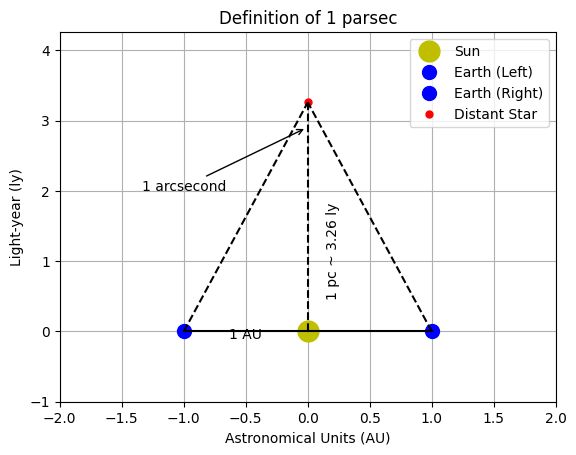

In [5]:
'''畫圖解釋秒差距的定義'''
import matplotlib.pyplot as plt
from astropy import units as u

# 使用Astropy定義距離單位
distance_in_parsec = 1 * u.pc
distance_in_ly = distance_in_parsec.to(u.lyr)

# 圖中的點位置
sun_position = (0, 0)  # 太陽的位置
earth_position_left = (-1, 0)  # 左側地球的位置
earth_position_right = (1, 0)  # 右側地球的位置
star_position = (0, distance_in_ly.value)  # 遠方恆星的位置

# 建立圖形和軸
fig, ax = plt.subplots()

# 繪製太陽、地球和遠方恆星
ax.plot(sun_position[0], sun_position[1], 'yo', markersize=15, label='Sun')
ax.plot(earth_position_left[0], earth_position_left[1], 'bo', markersize=10, label='Earth (Left)')
ax.plot(earth_position_right[0], earth_position_right[1], 'bo', markersize=10, label='Earth (Right)')
ax.plot(star_position[0], star_position[1], 'ro', markersize=5, label='Distant Star')

# 繪製連線
ax.plot([sun_position[0], earth_position_left[0]], [sun_position[1], earth_position_left[1]], 'k-')
ax.plot([sun_position[0], earth_position_right[0]], [sun_position[1], earth_position_right[1]], 'k-')

# 使用虛線繪製地球到遠方恆星的連線
ax.plot([earth_position_left[0], star_position[0]], [earth_position_left[1], star_position[1]], 'k--')
ax.plot([earth_position_right[0], star_position[0]], [earth_position_right[1], star_position[1]], 'k--')
ax.plot([sun_position[0], star_position[0]], [sun_position[1], star_position[1]], 'k--')

# 標註
ax.annotate('1 AU', xy=(-0.5, -0.1), ha='center')
ax.annotate(f'1 pc ~ {distance_in_ly.value:.2f} ly', xy=(0.2, 0.5), ha='center', rotation=90)
ax.annotate('1 arcsecond', xy=(-0.01, 2.9), xytext=(-1, 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             ha='center')

# 設定圖表標題和軸標籤
ax.set_title('Definition of 1 parsec')
ax.set_xlabel('Astronomical Units (AU)')
ax.set_ylabel('Light-year (ly)')

# 調整圖表範圍和顯示
ax.set_xlim(-2, 2)
ax.set_ylim(-1, distance_in_ly.value + 1)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
'''取得北極星的距離資訊'''
from astroquery.simbad import Simbad
from astropy import units as u

# 查詢北極星的資料
Simbad.add_votable_fields('parallax')
result_table = Simbad.query_object("Polaris")

# 從結果中獲得視差值(單位為毫角秒mas)，並轉換為秒差距和光年
parallax = result_table['PLX_VALUE'][0] * u.mas
distance_pc = parallax.to(u.pc, equivalencies=u.parallax())
distance_ly = distance_pc.to(u.lyr)

print(f"北極星的視差是：{parallax.value} 毫角秒")
print(f"北極星距離我們大約是：{distance_pc.value:.2f} 秒差距")
print(f"也就是大約：{distance_ly.value:.2f} 光年")

北極星的視差是：7.54 毫角秒
北極星距離我們大約是：132.63 秒差距
也就是大約：432.57 光年


## (三) 如何用Python探索星體有多亮？


In [7]:
'''藉由星體的視星等和距離資訊，計算出它的絕對星等'''
from astropy import units as u
import math

# 假設星體的視星等 m 和距離 d（單位：秒差距）
m = 1 # 視星等
d = 100 * u.pc # 距離（秒差距）

# 距離模數（distance modulus）公式：mu = m - M = 5 * log10(d / 10pc)
mu = 5 * math.log10(d / (10 * u.pc))

# 計算絕對星等 M
M = m - mu
print(f" 這個星體的絕對星等為 : {M}")

 這個星體的絕對星等為 : -4.0


In [8]:
'''取得北極星的視星等和距離資訊，並計算出它的絕對星等'''
from astroquery.simbad import Simbad
import astropy.units as u
from math import log10

# 查詢 SIMBAD 資料庫中的北極星資料
Simbad.add_votable_fields('parallax', 'flux(U)', 'flux(B)', 'flux(V)', 'flux(R)', 'flux(I)')
result_table = Simbad.query_object("Polaris")

# 從結果中獲得視差值 ( 單位為毫角秒 mas)，並轉換為秒差距
parallax = result_table['PLX_VALUE'][0] * u.mas
star_distance = parallax.to(u.pc, equivalencies=u.parallax())

# 取得 UBVRI 各波段的視星等資料
mag_U = result_table['FLUX_U'][0]
mag_B = result_table['FLUX_B'][0]
mag_V = result_table['FLUX_V'][0]
mag_R = result_table['FLUX_R'][0]
mag_I = result_table['FLUX_I'][0]

# 計算絕對星等
def calculate_absolute_magnitude(mag, star_distance):
    return mag - 5 * log10((star_distance / (10 * u.pc)))

abs_mag_U = calculate_absolute_magnitude(mag_U, star_distance)
abs_mag_B = calculate_absolute_magnitude(mag_B, star_distance)
abs_mag_V = calculate_absolute_magnitude(mag_V, star_distance)
abs_mag_R = calculate_absolute_magnitude(mag_R, star_distance)
abs_mag_I = calculate_absolute_magnitude(mag_I, star_distance)

# 輸出絕對星等結果
print(f" 北極星的絕對星等 (U 波段 )： {abs_mag_U:.2f}")
print(f" 北極星的絕對星等 (B 波段 )： {abs_mag_B:.2f}")
print(f" 北極星的絕對星等 (V 波段 )： {abs_mag_V:.2f}")
print(f" 北極星的絕對星等 (R 波段 )： {abs_mag_R:.2f}")
print(f" 北極星的絕對星等 (I 波段 )： {abs_mag_I:.2f}")

 北極星的絕對星等 (U 波段 )： -2.61
 北極星的絕對星等 (B 波段 )： -2.99
 北極星的絕對星等 (V 波段 )： -3.59
 北極星的絕對星等 (R 波段 )： -4.08
 北極星的絕對星等 (I 波段 )： -4.39
